## The code can be generalised better but for the purpose of the research this prototype runs as per needs

The following code allows to import strates and transition files  and other txt files related to probabilistic model checking. You can import strates and transition files and output the states when a specific action was chosen

In [1]:
# importing pandas
import pandas as pd

In [2]:
# importing numpy
import numpy as np

In [3]:
# importing numpy
import matplotlib.pyplot as plt

In [5]:
# Ignore this cell
# path = "~/project_files/prism-modelling-l4/shut-the-box-game/"
# f = open(path + "stb_rmax.tra", "r")

### Export Rmax 
In order to export results for maximum expected reachability and conduct analysis run the cell below and comment out the cell that starts with a comment: # CELL TO IMPORT RMIN

In [4]:
# CELL TO IMPORT RMAX
# Read Text Files with Pandas using read_csv()
  
# read text file into pandas DataFrame
df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/stb_rmax.sta", sep="\s+|:\(|,|\(|\)|:", engine="python", usecols = [i for i in range(1,12)])

# get_array
stb_sta = df.values

# upload transition file into numpy array
stb_tra = np.loadtxt("stb_rmax.tra", delimiter=" ", skiprows=1, dtype={'names': ('state_number', 'sth', 'transition_state', 'probability','action'),
'formats': ('i4','i4','i4','f4','S3')})

print(df)

states = np.loadtxt("stb_rmax.tra", delimiter=" ", skiprows=1, usecols=(0,2), dtype=int)
trans_prblty = np.loadtxt("stb_rmax.tra", delimiter=" ", skiprows=1, usecols=3, dtype=float)
actions = np.loadtxt("stb_rmax.tra", delimiter=" ", skiprows=1, usecols=4, dtype=str)

      s  sum  p1  p2  p3  p4  p5  p6  p7  p8  p9
0     0    0   0   0   0   0   0   0   0   0   0
1     0    0   0   0   0   0   0   0   0   0   1
2     0    0   0   0   0   0   0   0   0   1   0
3     0    0   0   0   0   0   0   0   0   1   1
4     0    0   0   0   0   0   0   0   1   0   0
...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
6590  2    0   1   1   1   1   1   1   0   1   1
6591  2    0   1   1   1   1   1   1   1   0   0
6592  2    0   1   1   1   1   1   1   1   0   1
6593  2    0   1   1   1   1   1   1   1   1   0
6594  2    0   1   1   1   1   1   1   1   1   1

[6595 rows x 11 columns]


### Export Rmin and run analysis 
In order to export results for maximum expected reachability and conduct analysis run the cell below and comment out the cell that starts with a comment: # CELL TO IMPORT RMAX

In [8]:
# CELL TO IMPORT RMIN
# Read Text Files with Pandas using read_csv()
  
# read text file into pandas DataFrame for minimum reward states
df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/stb_rmin.sta", sep="\s+|:\(|,|\(|\)|:", engine="python", usecols = [i for i in range(1,12)])

# get_array
stb_sta = df.values

print(stb_sta)

states = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=(0,2), dtype=int)
trans_prblty = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=3, dtype=float)
actions = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=4, dtype=str)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [2 0 1 ... 1 0 1]
 [2 0 1 ... 1 1 0]
 [2 0 1 ... 1 1 1]]


In [5]:
# Data Analysis Starts Here

#Note: if closing of boxes decision also has to be removed then try combinations of most popular moves.

#cases where two dice are thrown
two_dice_in = np.where(actions == "two")

#all states where two dice is thrown
states_two_dice = states[two_dice_in][:,0]
count_2d = states_two_dice.shape[0]

#information about the states where two dice is thrown
#i.e what box pieces are covered
sta_2d_info = stb_sta[states_two_dice]
np.savetxt("sta_2d.txt", sta_2d_info, delimiter=",", fmt="%d")
#this shows that almost never 1 & 2 are filled on a sum caused by two dice
#so, second strategy would be to not cover 1 & 2 whenever a result from two dice is thrown, 
#whilst throwing results on two dice until 7,8,9 are covered. So don't close combinations the include 1 or 2
#print(sta_2d_info)

# check if in all states 12 are 0
sta1 = sta_2d_info[sta_2d_info[:,2]==0]
count1 = sta1.shape[0]

sta9 = sta_2d_info[sta_2d_info[:,10]==1]
sta8 = sta9[sta9[:,9]==1]
sta7 = sta8[sta8[:,8]==1]
count789 = sta7.shape[0]
print("States where two dice is thrown after 7,8,9 pieces have been closed ", sta7)
print("Count of states where two dice is thrown after 7,8,9 pieces have been closed ", count789)

States where two dice is thrown after 7,8,9 pieces have been closed  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
Count of states where two dice is thrown after 7,8,9 pieces have been closed  154


In [6]:
#cases where one die are thrown
one_die_in = np.where(actions == "one")

#all states where one die is thrown
states_one_die = states[one_die_in][:,0]

#information about the states where one die is thrown
#i.e what box pieces are covered
sta_1d_info = stb_sta[states_one_die]
print(sta_1d_info)
np.savetxt("sta_1d.txt", sta_1d_info, delimiter=",", fmt="%d")

#count of all the states where 1 die is thrown as opposed to 2 dice
#in the states where 1 die is thrown it is a choice between 1 or 2
count_1d = states_one_die.shape[0]

#plot the count
# y = np.array([count_1d, count789, count_2d])
# x = np.array(['one', two, 'all_two'])


[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]


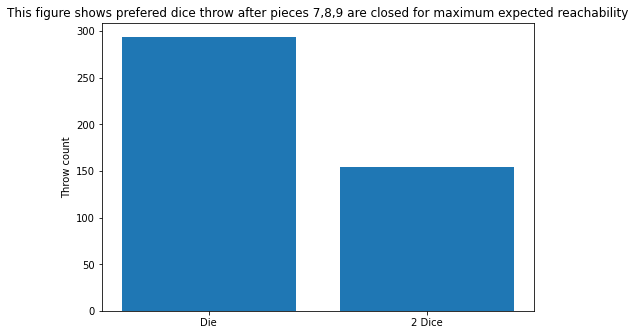

In [7]:
# try some plots

# Create figure and subplot

# Plot the decision between two and one dice 
# when such decision is possible

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# add caption for Rmax
ax.set_title("This figure shows prefered dice throw after pieces 7,8,9 are closed for maximum expected reachability")
# add y-axis for Rmax
ax.set_ylabel('Throw count')


langs = ['Die', '2 Dice']
count_d = np.array([count_1d, count789])

ax.bar(langs,count_d)

plt.show()

# The games rules state that until 7,8,9 the player has to throw 2 dice. After the 7,8,9 box pieces are filled
# the player can decide whether to throw a die or two dice. It can be seen here that in this case almost twice 
# as much times throwing 1 die is prefered. Therefore, a strategy to try is throwing 1 die the moment 7,8,9 are
# box pieces are filled.

## Below cells provide code extracts a preference over each action for a given sum and geneates a file with all states when a specific action in chosen for a given sum

### Ignore these cells if you do not wish to see the output as files will be extracted onto your system

In [38]:
# function that @returns numbers of occurrences
# for a @param action_str the action string

def a_count(a_str, num):
    sum_in = np.where(actions == a_str)
    #all states 
    sta_sum = states[sum_in][:,0]
    sta_sum_info = stb_sta[sta_sum]
    file = "sta_"+str(num)+a_str+".txt"
    np.savetxt(file, sta_sum_info, delimiter=",", fmt="%d")
    c_sta = sta_sum.shape[0]
    return c_sta


In [39]:
# find most popular action for each sum

# function that @returns numbers of occurrences
# for a @param action_str the action string

# def a_count(a_str):
#     sum12_in = np.where(actions == a_str)
#     #all states 
#     sta_sum12 = states[sum12_in][:,0]
#     sta_12_info = stb_sta[sta_sum12]
#     file = "sta_"+a_str+".txt"
#     np.savetxt(file, sta_12_info, delimiter=",", fmt="%d")
#     c_sta = sta_sum12.shape[0]
#     return c_sta

#sum=12
a_str = "c1245"
print('times 1245 action was chosen:', a_count(a_str, 12))

a_str = "c1236"
print('times c1236 action was chosen:', a_count(a_str, 12))

a_str = "c345"
print('times 345 action was chosen:', a_count(a_str, 12))

a_str = "c246"
print('times 246 action was chosen:', a_count(a_str, 12))

a_str = "c237"
print('times 237 action was chosen:', a_count(a_str, 12))

a_str = "c156"
print('times 156 action was chosen:', a_count(a_str, 12))

a_str = "c147"
print('times 147 action was chosen:', a_count(a_str, 12))

a_str = "c138"
print('times 138 action was chosen:', a_count(a_str, 12))

a_str = "c129"
print('times 129 action was chosen:', a_count(a_str, 12))

a_str = "c57"
print('times c57 action was chosen:', a_count(a_str, 12))

a_str = "c48"
print('times c48 action was chosen:', a_count(a_str, 12))

a_str = "c39"
print('times c39 action was chosen:', a_count(a_str, 12))

times 1245 action was chosen: 22
times c1236 action was chosen: 31
times 345 action was chosen: 23
times 246 action was chosen: 30
times 237 action was chosen: 38
times 156 action was chosen: 27
times 147 action was chosen: 40
times 138 action was chosen: 32
times 129 action was chosen: 19
times c57 action was chosen: 42
times c48 action was chosen: 37
times c39 action was chosen: 32


In [40]:
#sum11
a_str = "c1235"
print('times c1235 action was chosen:', a_count(a_str, 11))

a_str = "c245"
print('times c245 action was chosen:', a_count(a_str, 11))

a_str = "c236"
print('times c236 action was chosen:', a_count(a_str, 11))

a_str = "c146"
print('times c146 action was chosen:', a_count(a_str, 11))

a_str = "c137"
print('times c137 action was chosen:', a_count(a_str, 11))

a_str = "c128"
print('times c128 action was chosen:', a_count(a_str, 11))

a_str = "c56"
print('times c56 action was chosen:', a_count(a_str, 11))

a_str = "c47"
print('times c47 action was chosen:', a_count(a_str, 11))

a_str = "c38"
print('times c38 action was chosen:', a_count(a_str, 11))

a_str = "c29"
print('times c29 action was chosen:', a_count(a_str, 11))

times c1235 action was chosen: 30
times c245 action was chosen: 31
times c236 action was chosen: 34
times c146 action was chosen: 38
times c137 action was chosen: 43
times c128 action was chosen: 37
times c56 action was chosen: 40
times c47 action was chosen: 53
times c38 action was chosen: 45
times c29 action was chosen: 34


In [14]:
#sum10
a_str = "c1234"
print('times c1234 action was chosen:', a_count(a_str, 10))

a_str = "c145"
print('times c145 action was chosen:', a_count(a_str, 10))

a_str = "c136"
print('times c136 action was chosen:', a_count(a_str, 10))

a_str = "c127"
print('times c127 action was chosen:', a_count(a_str, 10))

a_str = "c235"
print('times c235 action was chosen:', a_count(a_str, 10))

a_str = "c46"
print('times c46 action was chosen:', a_count(a_str), 10)

a_str = "c37"
print('times c37 action was chosen:', a_count(a_str), 10)

a_str = "c28"
print('times c28 action was chosen:', a_count(a_str), 10)

a_str = "c19"
print('times c19 action was chosen:', a_count(a_str), 10)

TypeError: a_count() missing 1 required positional argument: 'num'

In [12]:
#sum9
a_str = "c234"
print('times c234 action was chosen:', a_count(a_str), 9)

a_str = "c135"
print('times c135 action was chosen:', a_count(a_str), 9)

a_str = "c126"
print('times c126 action was chosen:', a_count(a_str), 9)

a_str = "c45"
print('times c45 action was chosen:', a_count(a_str), 9)

a_str = "c36"
print('times c36 action was chosen:', a_count(a_str), 9)

a_str = "c27"
print('times c27 action was chosen:', a_count(a_str), 9)

a_str = "c18"
print('times c18 action was chosen:', a_count(a_str), 9)

a_str = "c9"
print('times c9 action was chosen:', a_count(a_str), 9)

times c234 action was chosen: 47
times c135 action was chosen: 50
times c126 action was chosen: 53
times c45 action was chosen: 48
times c36 action was chosen: 52
times c27 action was chosen: 63
times c18 action was chosen: 53
times c9 action was chosen: 73


In [13]:
#sum8
a_str = "c134"
print('times c134 action was chosen:', a_count(a_str), 8)

a_str = "c125"
print('times c125 action was chosen:', a_count(a_str), 8)

a_str = "c35"
print('times c35 action was chosen:', a_count(a_str), 8)

a_str = "c17"
print('times c17 action was chosen:', a_count(a_str), 8)

a_str = "c26"
print('times c26 action was chosen:', a_count(a_str), 8)

a_str = "c8"
print('times c8 action was chosen:', a_count(a_str), 8)

times c134 action was chosen: 54
times c125 action was chosen: 54
times c35 action was chosen: 63
times c17 action was chosen: 73
times c26 action was chosen: 71
times c8 action was chosen: 98


In [14]:
#sum7
a_str = "c124"
print('times c124 action was chosen:', a_count(a_str), 7)

a_str = "c34"
print('times c34 action was chosen:', a_count(a_str), 7)

a_str = "c16"
print('times c16 action was chosen:', a_count(a_str), 7)

a_str = "c25"
print('times c25 action was chosen:', a_count(a_str), 7)

a_str = "c7"
print('times c26 action was chosen:', a_count(a_str), 7)

times c124 action was chosen: 63
times c34 action was chosen: 75
times c16 action was chosen: 85
times c25 action was chosen: 74
times c26 action was chosen: 110


In [15]:
#sum6 coulld be 1/2 die/dice
a_str = "c123"
print('times c123 action was chosen:', a_count(a_str), 6)

a_str = "c24"
print('times c24 action was chosen:', a_count(a_str), 6)

a_str = "c15"
print('times c15 action was chosen:', a_count(a_str), 6)

a_str = "c6"
print('times c6 action was chosen:', a_count(a_str), 6)

times c123 action was chosen: 64
times c24 action was chosen: 85
times c15 action was chosen: 90
times c6 action was chosen: 136


In [16]:
#sum5 coulld be 1/2 die/dice
a_str = "c23"
print('times c23 action was chosen:', a_count(a_str), 5)

a_str = "c14"
print('times c14 action was chosen:', a_count(a_str), 5)

a_str = "c5"
print('times c5 action was chosen:', a_count(a_str), 5)

times c23 action was chosen: 110
times c14 action was chosen: 113
times c5 action was chosen: 144


In [17]:
#sum4 coulld be 1/2 die/dice
a_str = "c13"
print('times c13 action was chosen:', a_count(a_str), 4)

a_str = "c4"
print('times c4 action was chosen:', a_count(a_str), 4)

times c13 action was chosen: 128
times c4 action was chosen: 191


In [18]:
#sum3 coulld be 1/2 die/dice
a_str = "c12"
print('times c12 action was chosen:', a_count(a_str), 3)

a_str = "c3"
print('times c3 action was chosen:', a_count(a_str), 3)

times c12 action was chosen: 128
times c3 action was chosen: 191


In [19]:
#sum2 coulld be 1/2 die/dice
a_str = "c2"
print('times c2 action was chosen:', a_count(a_str), 2)

times c2 action was chosen: 255


In [20]:
#sum1 coulld be 1/2 die/dice
a_str = "c1"
print('times c1 action was chosen:', a_count(a_str), 1)

times c1 action was chosen: 32


### Code to generate states per action per sum ENDS HERE

Run the cells below to see a column diagram for minimum expected reachability states and transition files.

In [9]:
# Data Analysis Starts Here

#Note: if closing of boxes decision also has to be removed then try combinations of most popular moves.

#cases where two dice are thrown
two_dice_in = np.where(actions == "two")

#all states where two dice is thrown
states_two_dice = states[two_dice_in][:,0]
count_2d = states_two_dice.shape[0]

#information about the states where two dice is thrown
#i.e what box pieces are covered
sta_2d_info = stb_sta[states_two_dice]
print(sta_2d_info)
#np.savetxt("sta_2drmin.txt", sta_2d_info, delimiter=",", fmt="%d")

sta9 = sta_2d_info[sta_2d_info[:,10]==1]
sta8 = sta9[sta9[:,9]==1]
sta7 = sta8[sta8[:,8]==1]
count789 = sta7.shape[0]
print("States where two dice is thrown after 7,8,9 pieces have been closed ", sta7)
print("Count of states where two dice is thrown after 7,8,9 pieces have been closed ", count789)


#cases where one die are thrown
one_die_in = np.where(actions == "one")

#all states where one die is thrown
states_one_die = states[one_die_in][:,0]

#information about the states where one die is thrown
#i.e what box pieces are covered
sta_1d_info = stb_sta[states_one_die]
print(sta_1d_info)
#np.savetxt("sta_1drmin.txt", sta_1d_info, delimiter=",", fmt="%d")

#count of all the states where 1 die is thrown as opposed to 2 dice
#in the states where 1 die is thrown it is a choice between 1 or 2
count_1d = states_one_die.shape[0]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 1 0]
 [0 0 1 ... 1 1 0]
 [0 0 1 ... 1 1 0]]
States where two dice is thrown after 7,8,9 pieces have been closed  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
Count of states where two dice is thrown after 7,8,9 pieces have been closed  539
[[0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1

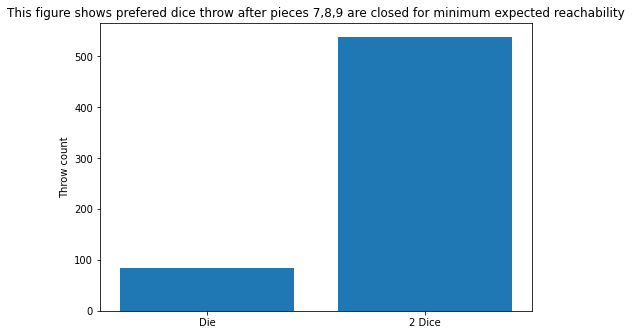

In [10]:
# try some plots

# Create figure and subplot

# Plot the decision between two and one dice 
# when such decision is possible


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# add caption for Rmin
ax.set_title("This figure shows prefered dice throw after pieces 7,8,9 are closed for minimum expected reachability")
# add y-axis for Rmin
ax.set_ylabel('Throw count')

langs = ['Die', '2 Dice']
count_d = np.array([count_1d, count789])

ax.bar(langs,count_d)

plt.show()


### The following cells show code that performs intersection to find common states and their rewards between the minimum expected reachability of the model and the expected reachability for the strategy

The code outputs as a result the difference and then enables a lookup between individual states.

In [11]:
# states = np.loadtxt("rmin_strat.txt", delimiter=" ", skiprows=76, usecols=(0,2), dtype=int)
cols = [i for i in range(0,12)]
cols.append(13)
# df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/rmin_strat.txt", sep="\s+|:\(|,|\(|\)|:|=", engine="python", skiprows=77, skipfooter=12, usecols = cols)
df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/state_rewards_2d", sep="\s+|:\(|,|\(|\)|:|=", engine="python", usecols = cols)
strat_sta_info = df.loc[:, :'p9'].values
sta = strat_sta_info[:,1:]
strategy_ids = strat_sta_info[:,0]
print(sta)
strat_sta_rew = df.rewards
# print(strat_sta_info)


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 1 12  1 ...  1  0  0]
 [ 1 12  1 ...  1  0  1]
 [ 1 12  1 ...  1  1  0]]


In [12]:
# states = np.loadtxt("rmin_strat.txt", delimiter=" ", skiprows=76, usecols=(0,2), dtype=int)
cols = [i for i in range(0,12)]
cols.append(13)
# df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/rmin_strat.txt", sep="\s+|:\(|,|\(|\)|:|=", engine="python", skiprows=77, skipfooter=12, usecols = cols)
dfm = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/state_rewards_model", sep="\s+|:\(|,|\(|\)|:|=", engine="python", usecols = cols)
strat_stam_info = dfm.loc[:, :'p9'].values
stam = strat_stam_info[:,1:]
optimal_ids = strat_stam_info[:,0]
print(stam)
strat_stam_rew = dfm.rewards
print(strat_stam_info)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 1 12  1 ...  1  0  0]
 [ 1 12  1 ...  1  0  1]
 [ 1 12  1 ...  1  1  0]]
[[   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    1]
 [   2    0    0 ...    0    1    0]
 ...
 [6192    1   12 ...    1    0    0]
 [6193    1   12 ...    1    0    1]
 [6194    1   12 ...    1    1    0]]


In [13]:
#create subset sets

indices = []
print(stb_sta.shape[0])
print(sta.shape[0])
for i in range(0, stam.shape[0]):
#     any((sta[:]==[1,2]).all(1))
    if(stam[i].tolist() in sta.tolist()):
        print("here")
        print(stb_sta[i])
        indices.append(i)
print(len(indices))


6595
5447
here
[0 0 0 0 0 0 0 0 0 0 0]
here
[0 0 0 0 0 0 0 0 0 0 1]
here
[0 0 0 0 0 0 0 0 0 1 0]
here
[0 0 0 0 0 0 0 0 0 1 1]
here
[0 0 0 0 0 0 0 0 1 0 0]
here
[0 0 0 0 0 0 0 0 1 0 1]
here
[0 0 0 0 0 0 0 0 1 1 0]
here
[0 0 0 0 0 0 0 0 1 1 1]
here
[0 0 0 0 0 0 0 1 0 0 0]
here
[0 0 0 0 0 0 0 1 0 0 1]
here
[0 0 0 0 0 0 0 1 0 1 0]
here
[0 0 0 0 0 0 0 1 0 1 1]
here
[0 0 0 0 0 0 0 1 1 0 0]
here
[0 0 0 0 0 0 0 1 1 0 1]
here
[0 0 0 0 0 0 0 1 1 1 0]
here
[0 0 0 0 0 0 0 1 1 1 1]
here
[0 0 0 0 0 0 1 0 0 0 0]
here
[0 0 0 0 0 0 1 0 0 0 1]
here
[0 0 0 0 0 0 1 0 0 1 0]
here
[0 0 0 0 0 0 1 0 0 1 1]
here
[0 0 0 0 0 0 1 0 1 0 0]
here
[0 0 0 0 0 0 1 0 1 0 1]
here
[0 0 0 0 0 0 1 0 1 1 0]
here
[0 0 0 0 0 0 1 0 1 1 1]
here
[0 0 0 0 0 0 1 1 0 0 0]
here
[0 0 0 0 0 0 1 1 0 0 1]
here
[0 0 0 0 0 0 1 1 0 1 0]
here
[0 0 0 0 0 0 1 1 0 1 1]
here
[0 0 0 0 0 0 1 1 1 0 0]
here
[0 0 0 0 0 0 1 1 1 0 1]
here
[0 0 0 0 0 0 1 1 1 1 0]
here
[0 0 0 0 0 0 1 1 1 1 1]
here
[0 0 0 0 0 1 0 0 0 0 0]
here
[0 0 0 0 0 1 0 0 0 0 1]
here

here
[0 0 1 1 0 0 0 1 1 0 1]
here
[0 0 1 1 0 0 0 1 1 1 0]
here
[0 0 1 1 0 0 0 1 1 1 1]
here
[0 0 1 1 0 0 1 0 0 0 1]
here
[0 0 1 1 0 0 1 0 0 1 1]
here
[0 0 1 1 0 0 1 0 1 0 1]
here
[0 0 1 1 0 0 1 0 1 1 0]
here
[0 0 1 1 0 0 1 0 1 1 1]
here
[0 0 1 1 0 0 1 1 0 0 0]
here
[0 0 1 1 0 0 1 1 0 0 1]
here
[0 0 1 1 0 0 1 1 0 1 0]
here
[0 0 1 1 0 0 1 1 0 1 1]
here
[0 0 1 1 0 0 1 1 1 0 0]
here
[0 0 1 1 0 0 1 1 1 0 1]
here
[0 0 1 1 0 0 1 1 1 1 0]
here
[0 0 1 1 0 0 1 1 1 1 1]
here
[0 0 1 1 0 1 0 0 0 0 1]
here
[0 0 1 1 0 1 0 0 0 1 1]
here
[0 0 1 1 0 1 0 0 1 0 1]
here
[0 0 1 1 0 1 0 0 1 1 0]
here
[0 0 1 1 0 1 0 0 1 1 1]
here
[0 0 1 1 0 1 0 1 0 0 1]
here
[0 0 1 1 0 1 0 1 0 1 1]
here
[0 0 1 1 0 1 0 1 1 0 0]
here
[0 0 1 1 0 1 0 1 1 0 1]
here
[0 0 1 1 0 1 0 1 1 1 0]
here
[0 0 1 1 0 1 0 1 1 1 1]
here
[0 0 1 1 0 1 1 0 0 0 0]
here
[0 0 1 1 0 1 1 0 0 0 1]
here
[0 0 1 1 0 1 1 0 0 1 0]
here
[0 0 1 1 0 1 1 0 0 1 1]
here
[0 0 1 1 0 1 1 0 1 0 0]
here
[0 0 1 1 0 1 1 0 1 0 1]
here
[0 0 1 1 0 1 1 0 1 1 0]
here
[0 0 1 1 

here
[1 2 1 0 0 0 1 0 1 1 0]
here
[1 2 1 0 0 0 1 1 0 0 0]
here
[1 2 1 0 0 0 1 1 0 1 0]
here
[1 2 1 0 0 0 1 1 0 1 1]
here
[1 2 1 0 0 0 1 1 1 0 0]
here
[1 2 1 0 0 0 1 1 1 1 0]
here
[1 2 1 0 0 1 0 0 0 0 0]
here
[1 2 1 0 0 1 0 0 0 1 0]
here
[1 2 1 0 0 1 0 0 0 1 1]
here
[1 2 1 0 0 1 0 0 1 0 0]
here
[1 2 1 0 0 1 0 0 1 1 0]
here
[1 2 1 0 0 1 0 1 0 0 0]
here
[1 2 1 0 0 1 0 1 0 1 0]
here
[1 2 1 0 0 1 0 1 0 1 1]
here
[1 2 1 0 0 1 0 1 1 0 0]
here
[1 2 1 0 0 1 0 1 1 1 0]
here
[1 2 1 0 0 1 1 0 0 0 0]
here
[1 2 1 0 0 1 1 0 0 1 0]
here
[1 2 1 0 0 1 1 0 0 1 1]
here
[1 2 1 0 0 1 1 0 1 0 0]
here
[1 2 1 0 0 1 1 0 1 0 1]
here
[1 2 1 0 0 1 1 0 1 1 0]
here
[1 2 1 0 0 1 1 0 1 1 1]
here
[1 2 1 0 0 1 1 1 0 0 0]
here
[1 2 1 0 0 1 1 1 0 0 1]
here
[1 2 1 0 0 1 1 1 0 1 0]
here
[1 2 1 0 0 1 1 1 0 1 1]
here
[1 2 1 0 0 1 1 1 1 0 0]
here
[1 2 1 0 0 1 1 1 1 1 0]
here
[1 2 1 0 1 0 0 0 0 0 0]
here
[1 2 1 0 1 0 0 0 0 1 0]
here
[1 2 1 0 1 0 0 0 0 1 1]
here
[1 2 1 0 1 0 0 0 1 0 0]
here
[1 2 1 0 1 0 0 0 1 1 0]
here
[1 2 1 0 

here
[1 3 0 1 0 0 0 1 0 1 0]
here
[1 3 0 1 0 0 0 1 0 1 1]
here
[1 3 0 1 0 0 0 1 1 0 0]
here
[1 3 0 1 0 0 0 1 1 0 1]
here
[1 3 0 1 0 0 0 1 1 1 0]
here
[1 3 0 1 0 0 0 1 1 1 1]
here
[1 3 0 1 0 0 1 0 0 0 0]
here
[1 3 0 1 0 0 1 0 0 0 1]
here
[1 3 0 1 0 0 1 0 0 1 0]
here
[1 3 0 1 0 0 1 0 0 1 1]
here
[1 3 0 1 0 0 1 0 1 0 0]
here
[1 3 0 1 0 0 1 0 1 0 1]
here
[1 3 0 1 0 0 1 0 1 1 0]
here
[1 3 0 1 0 0 1 0 1 1 1]
here
[1 3 0 1 0 0 1 1 0 0 0]
here
[1 3 0 1 0 0 1 1 0 0 1]
here
[1 3 0 1 0 0 1 1 0 1 0]
here
[1 3 0 1 0 0 1 1 0 1 1]
here
[1 3 0 1 0 0 1 1 1 0 0]
here
[1 3 0 1 0 0 1 1 1 0 1]
here
[1 3 0 1 0 0 1 1 1 1 0]
here
[1 3 0 1 0 0 1 1 1 1 1]
here
[1 3 0 1 0 1 0 0 0 0 0]
here
[1 3 0 1 0 1 0 0 0 0 1]
here
[1 3 0 1 0 1 0 0 0 1 0]
here
[1 3 0 1 0 1 0 0 0 1 1]
here
[1 3 0 1 0 1 0 0 1 0 0]
here
[1 3 0 1 0 1 0 0 1 0 1]
here
[1 3 0 1 0 1 0 0 1 1 0]
here
[1 3 0 1 0 1 0 0 1 1 1]
here
[1 3 0 1 0 1 0 1 0 0 0]
here
[1 3 0 1 0 1 0 1 0 0 1]
here
[1 3 0 1 0 1 0 1 0 1 0]
here
[1 3 0 1 0 1 0 1 0 1 1]
here
[1 3 0 1 

here
[1 3 1 1 1 1 1 1 0 1 1]
here
[1 3 1 1 1 1 1 1 1 0 0]
here
[1 3 1 1 1 1 1 1 1 0 1]
here
[1 3 1 1 1 1 1 1 1 1 0]
here
[1 3 1 1 1 1 1 1 1 1 1]
here
[1 4 0 0 0 0 0 0 0 0 0]
here
[1 4 0 0 0 0 0 0 0 0 1]
here
[1 4 0 0 0 0 0 0 0 1 0]
here
[1 4 0 0 0 0 0 0 0 1 1]
here
[1 4 0 0 0 0 0 0 1 0 0]
here
[1 4 0 0 0 0 0 0 1 0 1]
here
[1 4 0 0 0 0 0 0 1 1 0]
here
[1 4 0 0 0 0 0 0 1 1 1]
here
[1 4 0 0 0 0 0 1 0 0 0]
here
[1 4 0 0 0 0 0 1 0 0 1]
here
[1 4 0 0 0 0 0 1 0 1 0]
here
[1 4 0 0 0 0 0 1 0 1 1]
here
[1 4 0 0 0 0 0 1 1 0 0]
here
[1 4 0 0 0 0 0 1 1 0 1]
here
[1 4 0 0 0 0 0 1 1 1 0]
here
[1 4 0 0 0 0 0 1 1 1 1]
here
[1 4 0 0 0 0 1 0 0 0 0]
here
[1 4 0 0 0 0 1 0 0 0 1]
here
[1 4 0 0 0 0 1 0 0 1 0]
here
[1 4 0 0 0 0 1 0 0 1 1]
here
[1 4 0 0 0 0 1 0 1 0 0]
here
[1 4 0 0 0 0 1 0 1 0 1]
here
[1 4 0 0 0 0 1 0 1 1 0]
here
[1 4 0 0 0 0 1 0 1 1 1]
here
[1 4 0 0 0 0 1 1 0 0 0]
here
[1 4 0 0 0 0 1 1 0 0 1]
here
[1 4 0 0 0 0 1 1 0 1 0]
here
[1 4 0 0 0 0 1 1 0 1 1]
here
[1 4 0 0 0 0 1 1 1 0 0]
here
[1 4 0 0 

here
[1 4 1 0 0 1 1 0 1 0 0]
here
[1 4 1 0 0 1 1 0 1 0 1]
here
[1 4 1 0 0 1 1 0 1 1 0]
here
[1 4 1 0 0 1 1 1 0 0 0]
here
[1 4 1 0 0 1 1 1 0 1 0]
here
[1 4 1 0 0 1 1 1 1 0 0]
here
[1 4 1 0 0 1 1 1 1 0 1]
here
[1 4 1 0 0 1 1 1 1 1 0]
here
[1 4 1 0 1 0 0 0 0 0 0]
here
[1 4 1 0 1 0 0 0 0 1 0]
here
[1 4 1 0 1 0 0 0 1 0 0]
here
[1 4 1 0 1 0 0 0 1 0 1]
here
[1 4 1 0 1 0 0 0 1 1 0]
here
[1 4 1 0 1 0 0 1 0 0 0]
here
[1 4 1 0 1 0 0 1 0 1 0]
here
[1 4 1 0 1 0 0 1 1 0 0]
here
[1 4 1 0 1 0 0 1 1 0 1]
here
[1 4 1 0 1 0 0 1 1 1 0]
here
[1 4 1 0 1 0 1 0 0 0 0]
here
[1 4 1 0 1 0 1 0 0 1 0]
here
[1 4 1 0 1 0 1 0 0 1 1]
here
[1 4 1 0 1 0 1 0 1 0 0]
here
[1 4 1 0 1 0 1 0 1 0 1]
here
[1 4 1 0 1 0 1 0 1 1 0]
here
[1 4 1 0 1 0 1 0 1 1 1]
here
[1 4 1 0 1 0 1 1 0 0 0]
here
[1 4 1 0 1 0 1 1 0 0 1]
here
[1 4 1 0 1 0 1 1 0 1 0]
here
[1 4 1 0 1 0 1 1 0 1 1]
here
[1 4 1 0 1 0 1 1 1 0 0]
here
[1 4 1 0 1 0 1 1 1 0 1]
here
[1 4 1 0 1 0 1 1 1 1 0]
here
[1 4 1 0 1 0 1 1 1 1 1]
here
[1 4 1 0 1 1 0 0 0 0 0]
here
[1 4 1 0 

[1 5 0 1 0 1 0 0 1 1 1]
here
[1 5 0 1 0 1 0 1 0 0 0]
here
[1 5 0 1 0 1 0 1 0 0 1]
here
[1 5 0 1 0 1 0 1 0 1 0]
here
[1 5 0 1 0 1 0 1 0 1 1]
here
[1 5 0 1 0 1 0 1 1 0 0]
here
[1 5 0 1 0 1 0 1 1 0 1]
here
[1 5 0 1 0 1 0 1 1 1 0]
here
[1 5 0 1 0 1 0 1 1 1 1]
here
[1 5 0 1 0 1 1 0 0 0 0]
here
[1 5 0 1 0 1 1 0 0 0 1]
here
[1 5 0 1 0 1 1 0 0 1 0]
here
[1 5 0 1 0 1 1 0 0 1 1]
here
[1 5 0 1 0 1 1 0 1 0 0]
here
[1 5 0 1 0 1 1 0 1 0 1]
here
[1 5 0 1 0 1 1 0 1 1 0]
here
[1 5 0 1 0 1 1 0 1 1 1]
here
[1 5 0 1 0 1 1 1 0 0 0]
here
[1 5 0 1 0 1 1 1 0 0 1]
here
[1 5 0 1 0 1 1 1 0 1 0]
here
[1 5 0 1 0 1 1 1 0 1 1]
here
[1 5 0 1 0 1 1 1 1 0 0]
here
[1 5 0 1 0 1 1 1 1 0 1]
here
[1 5 0 1 0 1 1 1 1 1 0]
here
[1 5 0 1 0 1 1 1 1 1 1]
here
[1 5 0 1 1 0 0 0 0 0 0]
here
[1 5 0 1 1 0 0 0 0 0 1]
here
[1 5 0 1 1 0 0 0 0 1 0]
here
[1 5 0 1 1 0 0 0 0 1 1]
here
[1 5 0 1 1 0 0 0 1 0 0]
here
[1 5 0 1 1 0 0 0 1 0 1]
here
[1 5 0 1 1 0 0 0 1 1 0]
here
[1 5 0 1 1 0 0 0 1 1 1]
here
[1 5 0 1 1 0 0 1 0 0 0]
here
[1 5 0 1 1 0 0

here
[1 5 1 1 1 1 1 1 1 1 1]
here
[1 6 0 0 0 0 0 0 0 0 0]
here
[1 6 0 0 0 0 0 0 0 0 1]
here
[1 6 0 0 0 0 0 0 0 1 0]
here
[1 6 0 0 0 0 0 0 0 1 1]
here
[1 6 0 0 0 0 0 0 1 0 0]
here
[1 6 0 0 0 0 0 0 1 0 1]
here
[1 6 0 0 0 0 0 0 1 1 0]
here
[1 6 0 0 0 0 0 0 1 1 1]
here
[1 6 0 0 0 0 0 1 0 0 0]
here
[1 6 0 0 0 0 0 1 0 0 1]
here
[1 6 0 0 0 0 0 1 0 1 0]
here
[1 6 0 0 0 0 0 1 0 1 1]
here
[1 6 0 0 0 0 0 1 1 0 0]
here
[1 6 0 0 0 0 0 1 1 0 1]
here
[1 6 0 0 0 0 0 1 1 1 0]
here
[1 6 0 0 0 0 0 1 1 1 1]
here
[1 6 0 0 0 0 1 0 0 0 0]
here
[1 6 0 0 0 0 1 0 0 0 1]
here
[1 6 0 0 0 0 1 0 0 1 0]
here
[1 6 0 0 0 0 1 0 0 1 1]
here
[1 6 0 0 0 0 1 0 1 0 0]
here
[1 6 0 0 0 0 1 0 1 0 1]
here
[1 6 0 0 0 0 1 0 1 1 0]
here
[1 6 0 0 0 0 1 0 1 1 1]
here
[1 6 0 0 0 0 1 1 0 0 0]
here
[1 6 0 0 0 0 1 1 0 0 1]
here
[1 6 0 0 0 0 1 1 0 1 0]
here
[1 6 0 0 0 0 1 1 0 1 1]
here
[1 6 0 0 0 0 1 1 1 0 0]
here
[1 6 0 0 0 0 1 1 1 0 1]
here
[1 6 0 0 0 0 1 1 1 1 0]
here
[1 6 0 0 0 0 1 1 1 1 1]
here
[1 6 0 0 0 1 0 0 0 0 0]
here
[1 6 0 0 

here
[1 6 1 0 0 1 1 0 0 0 0]
here
[1 6 1 0 0 1 1 0 0 1 0]
here
[1 6 1 0 0 1 1 0 1 0 0]
here
[1 6 1 0 0 1 1 0 1 0 1]
here
[1 6 1 0 0 1 1 0 1 1 0]
here
[1 6 1 0 0 1 1 1 0 0 0]
here
[1 6 1 0 0 1 1 1 0 1 0]
here
[1 6 1 0 0 1 1 1 1 0 0]
here
[1 6 1 0 0 1 1 1 1 0 1]
here
[1 6 1 0 0 1 1 1 1 1 0]
here
[1 6 1 0 1 0 0 0 0 0 0]
here
[1 6 1 0 1 0 0 0 0 1 0]
here
[1 6 1 0 1 0 0 0 1 0 0]
here
[1 6 1 0 1 0 0 0 1 0 1]
here
[1 6 1 0 1 0 0 0 1 1 0]
here
[1 6 1 0 1 0 0 1 0 0 0]
here
[1 6 1 0 1 0 0 1 0 1 0]
here
[1 6 1 0 1 0 0 1 0 1 1]
here
[1 6 1 0 1 0 0 1 1 0 0]
here
[1 6 1 0 1 0 0 1 1 0 1]
here
[1 6 1 0 1 0 0 1 1 1 0]
here
[1 6 1 0 1 0 0 1 1 1 1]
here
[1 6 1 0 1 0 1 0 0 0 0]
here
[1 6 1 0 1 0 1 0 0 0 1]
here
[1 6 1 0 1 0 1 0 0 1 0]
here
[1 6 1 0 1 0 1 0 0 1 1]
here
[1 6 1 0 1 0 1 0 1 0 0]
here
[1 6 1 0 1 0 1 0 1 0 1]
here
[1 6 1 0 1 0 1 0 1 1 0]
here
[1 6 1 0 1 0 1 0 1 1 1]
here
[1 6 1 0 1 0 1 1 0 0 0]
here
[1 6 1 0 1 0 1 1 0 0 1]
here
[1 6 1 0 1 0 1 1 0 1 0]
here
[1 6 1 0 1 0 1 1 0 1 1]
here
[1 6 1 0 

here
[1 7 0 0 1 1 1 0 0 1 1]
here
[1 7 0 0 1 1 1 0 1 0 0]
here
[1 7 0 0 1 1 1 0 1 0 1]
here
[1 7 0 0 1 1 1 0 1 1 0]
here
[1 7 0 0 1 1 1 0 1 1 1]
here
[1 7 0 0 1 1 1 1 0 0 0]
here
[1 7 0 0 1 1 1 1 0 0 1]
here
[1 7 0 0 1 1 1 1 0 1 0]
here
[1 7 0 0 1 1 1 1 0 1 1]
here
[1 7 0 0 1 1 1 1 1 0 0]
here
[1 7 0 0 1 1 1 1 1 0 1]
here
[1 7 0 0 1 1 1 1 1 1 0]
here
[1 7 0 0 1 1 1 1 1 1 1]
here
[1 7 0 1 0 0 0 0 0 0 0]
here
[1 7 0 1 0 0 0 0 0 0 1]
here
[1 7 0 1 0 0 0 0 0 1 0]
here
[1 7 0 1 0 0 0 0 0 1 1]
here
[1 7 0 1 0 0 0 0 1 0 0]
here
[1 7 0 1 0 0 0 0 1 0 1]
here
[1 7 0 1 0 0 0 0 1 1 0]
here
[1 7 0 1 0 0 0 0 1 1 1]
here
[1 7 0 1 0 0 0 1 0 0 0]
here
[1 7 0 1 0 0 0 1 0 0 1]
here
[1 7 0 1 0 0 0 1 0 1 1]
here
[1 7 0 1 0 0 0 1 1 0 0]
here
[1 7 0 1 0 0 0 1 1 0 1]
here
[1 7 0 1 0 0 0 1 1 1 0]
here
[1 7 0 1 0 0 0 1 1 1 1]
here
[1 7 0 1 0 0 1 0 0 0 0]
here
[1 7 0 1 0 0 1 0 0 0 1]
here
[1 7 0 1 0 0 1 0 0 1 0]
here
[1 7 0 1 0 0 1 0 0 1 1]
here
[1 7 0 1 0 0 1 0 1 0 0]
here
[1 7 0 1 0 0 1 0 1 0 1]
here
[1 7 0 1 

here
[1 7 1 1 1 0 1 1 1 0 1]
here
[1 7 1 1 1 0 1 1 1 1 0]
here
[1 7 1 1 1 0 1 1 1 1 1]
here
[1 7 1 1 1 1 0 0 0 0 0]
here
[1 7 1 1 1 1 0 0 0 0 1]
here
[1 7 1 1 1 1 0 0 0 1 0]
here
[1 7 1 1 1 1 0 0 0 1 1]
here
[1 7 1 1 1 1 0 0 1 0 0]
here
[1 7 1 1 1 1 0 0 1 0 1]
here
[1 7 1 1 1 1 0 0 1 1 0]
here
[1 7 1 1 1 1 0 0 1 1 1]
here
[1 7 1 1 1 1 0 1 0 0 0]
here
[1 7 1 1 1 1 0 1 0 0 1]
here
[1 7 1 1 1 1 0 1 0 1 0]
here
[1 7 1 1 1 1 0 1 0 1 1]
here
[1 7 1 1 1 1 0 1 1 0 0]
here
[1 7 1 1 1 1 0 1 1 0 1]
here
[1 7 1 1 1 1 0 1 1 1 0]
here
[1 7 1 1 1 1 0 1 1 1 1]
here
[1 7 1 1 1 1 1 0 0 0 0]
here
[1 7 1 1 1 1 1 0 0 0 1]
here
[1 7 1 1 1 1 1 0 0 1 0]
here
[1 7 1 1 1 1 1 0 0 1 1]
here
[1 7 1 1 1 1 1 0 1 0 0]
here
[1 7 1 1 1 1 1 0 1 0 1]
here
[1 7 1 1 1 1 1 0 1 1 0]
here
[1 7 1 1 1 1 1 0 1 1 1]
here
[1 7 1 1 1 1 1 1 0 0 0]
here
[1 7 1 1 1 1 1 1 0 0 1]
here
[1 7 1 1 1 1 1 1 0 1 0]
here
[1 7 1 1 1 1 1 1 0 1 1]
here
[1 7 1 1 1 1 1 1 1 0 0]
here
[1 7 1 1 1 1 1 1 1 0 1]
here
[1 7 1 1 1 1 1 1 1 1 0]
here
[1 7 1 1 

here
[1 8 1 0 0 1 1 0 1 0 0]
here
[1 8 1 0 0 1 1 0 1 1 0]
here
[1 8 1 0 0 1 1 1 0 0 0]
here
[1 8 1 0 0 1 1 1 0 0 1]
here
[1 8 1 0 0 1 1 1 0 1 0]
here
[1 8 1 0 0 1 1 1 1 0 0]
here
[1 8 1 0 0 1 1 1 1 1 0]
here
[1 8 1 0 0 1 1 1 1 1 1]
here
[1 8 1 0 1 0 0 0 0 0 0]
here
[1 8 1 0 1 0 0 0 0 0 1]
here
[1 8 1 0 1 0 0 0 0 1 1]
here
[1 8 1 0 1 0 0 0 1 0 0]
here
[1 8 1 0 1 0 0 0 1 0 1]
here
[1 8 1 0 1 0 0 0 1 1 0]
here
[1 8 1 0 1 0 0 0 1 1 1]
here
[1 8 1 0 1 0 0 1 0 0 0]
here
[1 8 1 0 1 0 0 1 0 0 1]
here
[1 8 1 0 1 0 0 1 0 1 0]
here
[1 8 1 0 1 0 0 1 0 1 1]
here
[1 8 1 0 1 0 0 1 1 0 0]
here
[1 8 1 0 1 0 0 1 1 0 1]
here
[1 8 1 0 1 0 0 1 1 1 0]
here
[1 8 1 0 1 0 0 1 1 1 1]
here
[1 8 1 0 1 0 1 0 0 0 0]
here
[1 8 1 0 1 0 1 0 0 0 1]
here
[1 8 1 0 1 0 1 0 0 1 0]
here
[1 8 1 0 1 0 1 0 0 1 1]
here
[1 8 1 0 1 0 1 0 1 0 0]
here
[1 8 1 0 1 0 1 0 1 0 1]
here
[1 8 1 0 1 0 1 0 1 1 0]
here
[1 8 1 0 1 0 1 0 1 1 1]
here
[1 8 1 0 1 0 1 1 0 0 0]
here
[1 8 1 0 1 0 1 1 0 0 1]
here
[1 8 1 0 1 0 1 1 0 1 0]
here
[1 8 1 0 

here
[1 9 0 1 0 0 0 1 0 1 0]
here
[1 9 0 1 0 0 0 1 0 1 1]
here
[1 9 0 1 0 0 0 1 1 0 0]
here
[1 9 0 1 0 0 0 1 1 0 1]
here
[1 9 0 1 0 0 0 1 1 1 0]
here
[1 9 0 1 0 0 0 1 1 1 1]
here
[1 9 0 1 0 0 1 0 0 0 0]
here
[1 9 0 1 0 0 1 0 0 0 1]
here
[1 9 0 1 0 0 1 0 0 1 0]
here
[1 9 0 1 0 0 1 0 0 1 1]
here
[1 9 0 1 0 0 1 0 1 0 0]
here
[1 9 0 1 0 0 1 0 1 0 1]
here
[1 9 0 1 0 0 1 0 1 1 0]
here
[1 9 0 1 0 0 1 0 1 1 1]
here
[1 9 0 1 0 0 1 1 0 0 0]
here
[1 9 0 1 0 0 1 1 0 0 1]
here
[1 9 0 1 0 0 1 1 0 1 0]
here
[1 9 0 1 0 0 1 1 0 1 1]
here
[1 9 0 1 0 0 1 1 1 0 1]
here
[1 9 0 1 0 0 1 1 1 1 0]
here
[1 9 0 1 0 0 1 1 1 1 1]
here
[1 9 0 1 0 1 0 0 0 0 0]
here
[1 9 0 1 0 1 0 0 0 0 1]
here
[1 9 0 1 0 1 0 0 0 1 0]
here
[1 9 0 1 0 1 0 0 0 1 1]
here
[1 9 0 1 0 1 0 0 1 0 0]
here
[1 9 0 1 0 1 0 0 1 0 1]
here
[1 9 0 1 0 1 0 0 1 1 0]
here
[1 9 0 1 0 1 0 0 1 1 1]
here
[1 9 0 1 0 1 0 1 0 0 0]
here
[1 9 0 1 0 1 0 1 0 0 1]
here
[1 9 0 1 0 1 0 1 0 1 0]
here
[1 9 0 1 0 1 0 1 0 1 1]
here
[1 9 0 1 0 1 0 1 1 0 0]
here
[1 9 0 1 

here
[ 1 10  0  0  1  0  0  0  0  0  0]
here
[ 1 10  0  0  1  0  0  0  0  0  1]
here
[ 1 10  0  0  1  0  0  0  0  1  0]
here
[ 1 10  0  0  1  0  0  0  0  1  1]
here
[ 1 10  0  0  1  0  0  0  1  0  0]
here
[ 1 10  0  0  1  0  0  0  1  0  1]
here
[ 1 10  0  0  1  0  0  0  1  1  0]
here
[ 1 10  0  0  1  0  0  0  1  1  1]
here
[ 1 10  0  0  1  0  0  1  0  0  0]
here
[ 1 10  0  0  1  0  0  1  0  0  1]
here
[ 1 10  0  0  1  0  0  1  0  1  0]
here
[ 1 10  0  0  1  0  0  1  0  1  1]
here
[ 1 10  0  0  1  0  0  1  1  0  0]
here
[ 1 10  0  0  1  0  0  1  1  0  1]
here
[ 1 10  0  0  1  0  0  1  1  1  0]
here
[ 1 10  0  0  1  0  0  1  1  1  1]
here
[ 1 10  0  0  1  0  1  0  0  0  0]
here
[ 1 10  0  0  1  0  1  0  0  0  1]
here
[ 1 10  0  0  1  0  1  0  0  1  0]
here
[ 1 10  0  0  1  0  1  0  1  0  0]
here
[ 1 10  0  0  1  0  1  0  1  0  1]
here
[ 1 10  0  0  1  0  1  0  1  1  0]
here
[ 1 10  0  0  1  0  1  0  1  1  1]
here
[ 1 10  0  0  1  0  1  1  0  0  0]
here
[ 1 10  0  0  1  0  1  1  0  0  1]


here
[ 1 10  1  1  0  0  1  1  0  1  0]
here
[ 1 10  1  1  0  0  1  1  0  1  1]
here
[ 1 10  1  1  0  0  1  1  1  0  0]
here
[ 1 10  1  1  0  0  1  1  1  0  1]
here
[ 1 10  1  1  0  0  1  1  1  1  0]
here
[ 1 10  1  1  0  0  1  1  1  1  1]
here
[ 1 10  1  1  0  1  0  0  0  0  0]
here
[ 1 10  1  1  0  1  0  0  0  0  1]
here
[ 1 10  1  1  0  1  0  0  0  1  0]
here
[ 1 10  1  1  0  1  0  0  0  1  1]
here
[ 1 10  1  1  0  1  0  0  1  0  0]
here
[ 1 10  1  1  0  1  0  0  1  0  1]
here
[ 1 10  1  1  0  1  0  0  1  1  0]
here
[ 1 10  1  1  0  1  0  0  1  1  1]
here
[ 1 10  1  1  0  1  0  1  0  0  0]
here
[ 1 10  1  1  0  1  0  1  0  0  1]
here
[ 1 10  1  1  0  1  0  1  0  1  0]
here
[ 1 10  1  1  0  1  0  1  0  1  1]
here
[ 1 10  1  1  0  1  0  1  1  0  1]
here
[ 1 10  1  1  0  1  0  1  1  1  0]
here
[ 1 10  1  1  0  1  0  1  1  1  1]
here
[ 1 10  1  1  0  1  1  0  0  0  0]
here
[ 1 10  1  1  0  1  1  0  0  0  1]
here
[ 1 10  1  1  0  1  1  0  0  1  0]
here
[ 1 10  1  1  0  1  1  0  0  1  1]


here
[ 1 11  0  0  1  1  1  1  0  0  1]
here
[ 1 11  0  0  1  1  1  1  0  1  0]
here
[ 1 11  0  0  1  1  1  1  0  1  1]
here
[ 1 11  0  0  1  1  1  1  1  0  0]
here
[ 1 11  0  0  1  1  1  1  1  0  1]
here
[ 1 11  0  0  1  1  1  1  1  1  0]
here
[ 1 11  0  0  1  1  1  1  1  1  1]
here
[ 1 11  0  1  0  0  0  0  0  0  0]
here
[ 1 11  0  1  0  0  0  0  0  0  1]
here
[ 1 11  0  1  0  0  0  0  0  1  0]
here
[ 1 11  0  1  0  0  0  0  0  1  1]
here
[ 1 11  0  1  0  0  0  0  1  0  0]
here
[ 1 11  0  1  0  0  0  0  1  0  1]
here
[ 1 11  0  1  0  0  0  0  1  1  0]
here
[ 1 11  0  1  0  0  0  0  1  1  1]
here
[ 1 11  0  1  0  0  0  1  0  0  1]
here
[ 1 11  0  1  0  0  0  1  0  1  0]
here
[ 1 11  0  1  0  0  0  1  0  1  1]
here
[ 1 11  0  1  0  0  0  1  1  0  0]
here
[ 1 11  0  1  0  0  0  1  1  0  1]
here
[ 1 11  0  1  0  0  0  1  1  1  0]
here
[ 1 11  0  1  0  0  0  1  1  1  1]
here
[ 1 11  0  1  0  0  1  0  0  0  0]
here
[ 1 11  0  1  0  0  1  0  0  0  1]
here
[ 1 11  0  1  0  0  1  0  0  1  0]


here
[ 1 11  1  1  1  1  1  0  0  1  0]
here
[ 1 11  1  1  1  1  1  0  0  1  1]
here
[ 1 11  1  1  1  1  1  0  1  0  0]
here
[ 1 11  1  1  1  1  1  0  1  0  1]
here
[ 1 11  1  1  1  1  1  0  1  1  0]
here
[ 1 11  1  1  1  1  1  0  1  1  1]
here
[ 1 11  1  1  1  1  1  1  0  0  0]
here
[ 1 11  1  1  1  1  1  1  0  0  1]
here
[ 1 11  1  1  1  1  1  1  0  1  0]
here
[ 1 11  1  1  1  1  1  1  0  1  1]
here
[ 1 11  1  1  1  1  1  1  1  0  0]
here
[ 1 11  1  1  1  1  1  1  1  0  1]
here
[ 1 11  1  1  1  1  1  1  1  1  0]
here
[ 1 12  0  0  0  0  0  0  0  0  0]
here
[ 1 12  0  0  0  0  0  0  0  0  1]
here
[ 1 12  0  0  0  0  0  0  0  1  0]
here
[ 1 12  0  0  0  0  0  0  0  1  1]
here
[ 1 12  0  0  0  0  0  0  1  0  0]
here
[ 1 12  0  0  0  0  0  0  1  0  1]
here
[ 1 12  0  0  0  0  0  0  1  1  0]
here
[ 1 12  0  0  0  0  0  0  1  1  1]
here
[ 1 12  0  0  0  0  0  1  0  0  0]
here
[ 1 12  0  0  0  0  0  1  0  0  1]
here
[ 1 12  0  0  0  0  0  1  0  1  0]
here
[ 1 12  0  0  0  0  0  1  0  1  1]


here
[ 1 12  1  0  1  0  0  1  1  1  1]
here
[ 1 12  1  0  1  0  1  0  0  0  0]
here
[ 1 12  1  0  1  0  1  0  0  0  1]
here
[ 1 12  1  0  1  0  1  0  0  1  0]
here
[ 1 12  1  0  1  0  1  0  0  1  1]
here
[ 1 12  1  0  1  0  1  0  1  0  0]
here
[ 1 12  1  0  1  0  1  0  1  0  1]
here
[ 1 12  1  0  1  0  1  0  1  1  0]
here
[ 1 12  1  0  1  0  1  1  0  0  1]
here
[ 1 12  1  0  1  0  1  1  0  1  1]
here
[ 1 12  1  0  1  0  1  1  1  0  1]
here
[ 1 12  1  0  1  0  1  1  1  1  0]
here
[ 1 12  1  0  1  0  1  1  1  1  1]
here
[ 1 12  1  0  1  1  0  0  0  0  1]
here
[ 1 12  1  0  1  1  0  0  0  1  1]
here
[ 1 12  1  0  1  1  0  0  1  0  0]
here
[ 1 12  1  0  1  1  0  0  1  0  1]
here
[ 1 12  1  0  1  1  0  0  1  1  0]
here
[ 1 12  1  0  1  1  0  0  1  1  1]
here
[ 1 12  1  0  1  1  0  1  0  0  0]
here
[ 1 12  1  0  1  1  0  1  0  0  1]
here
[ 1 12  1  0  1  1  0  1  0  1  0]
here
[ 1 12  1  0  1  1  0  1  0  1  1]
here
[ 1 12  1  0  1  1  0  1  1  0  0]
here
[ 1 12  1  0  1  1  0  1  1  0  1]


In [14]:
arr = np.array(indices)

In [15]:
#rewards for the optimal model
stam_states = stam[indices]
print(stam_states)
# file = "common_states_check.txt"
# np.savetxt(file, stam_states, delimiter=",", fmt="%d")
filtered_rewards = strat_stam_rew.values[arr]
filter_optimal_ids = optimal_ids[arr]

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 1 12  1 ...  1  0  0]
 [ 1 12  1 ...  1  0  1]
 [ 1 12  1 ...  1  1  0]]


In [ ]:
# join ids from optimal strategy with rewards -> won't work as two different datatypes
# join ids of strategy with rewards -> won't work as two different datatypes


In [16]:
# substract the rewards:
# strategy reward from optimal
# the higher the reward the bigger the strategy
# <0 means strategy has better than optimal result
# >0 means strategy is bad
# =0 strategy is optimal
# strategy 
rewards_difference = strat_sta_rew - filtered_rewards
# file = "rewards_difference.txt"
# np.savetxt(file, rewards_difference, delimiter=",", fmt="%1.6f")
sort_rewards_difference_args = np.argsort(rewards_difference)
sorted_array_difference = rewards_difference[sort_rewards_difference_args]
max_diff_index = np.argmax(rewards_difference)
max_reward_difference = rewards_difference[max_diff_index]
print(max_diff_index)
print(max_reward_difference)
print(sorted_array_difference)
# file = "sorted_array_difference.txt"
# np.savetxt(file, sorted_array_difference, delimiter=",", fmt="%1.16f")

5192
2.6937157064471826
2723    0.000000
2836    0.000000
2837    0.000000
2838    0.000000
2843    0.000000
          ...   
4166    2.174146
4152    2.390411
2343    2.521143
2344    2.641890
5192    2.693716
Name: rewards, Length: 5447, dtype: float64


In [17]:
# descending order
largest_indices = np.argsort(-1*rewards_difference)

# you can use this code to see individual indices and look them up from the lists in the cell below 
# to see which is the state number in the optimal and in the strategy transitions and states files
# from the tranisiton files you can see the prefered action and from the state file you can see the exact state.
sorted_array_difference_new = rewards_difference[largest_indices][42:]
print(sorted_array_difference_new)

4381    0.898320
5071    0.878406
3703    0.870370
2797    0.863250
3814    0.846965
          ...   
2421    0.000000
2422    0.000000
2423    0.000000
2282    0.000000
5446    0.000000
Name: rewards, Length: 5405, dtype: float64


In [18]:
# find the state of largest difference
# state_id -> strategy
sta_strategy_id = strategy_ids[5071]
print(sta_strategy_id)
# state_id -> optimal
sta_optimal_id = filter_optimal_ids[5071]
print(sta_optimal_id)

5125
5750
